In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import sklearn as skl
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score, adjusted_rand_score, normalized_mutual_info_score, r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import scipy.cluster.hierarchy as shc
from sklearn.neighbors import NearestNeighbors
import time
import gdown
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


In [2]:
dados_sem_outliers = pd.read_csv("SGP_dados_regressão_v3_qc_leq_1.csv")

In [ ]:
# Volume de dados
dados_sem_outliers.shape

(5659, 12)

In [ ]:
# Estatística descritiva básica
dados_sem_outliers.describe()

,Mass_BC_PSAP_STP,Mass_ammonium_STP,Mass_chloride_STP,Mass_nitrate_STP,Mass_organics_STP,Mass_sulfate_STP,diam_geom_medio,conc D<50,conc D>100,area,vol,Scattering_Eff
count,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000
mean,0.037165,0.107764,0.002010,0.179465,0.522490,0.151105,55.789980,0.497718,0.241814,77.304993,2.318137,2.510138
std,0.035954,0.061179,0.005447,0.136673,0.173688,0.081497,18.752975,0.188518,0.141558,40.567595,1.397366,0.795605
min,0.000985,-0.220109,-0.030028,0.008770,0.092134,0.004975,18.988360,0.084350,0.007710,16.462445,0.450857,0.117509
25%,0.016108,0.063487,-0.000505,0.056134,0.382181,0.092231,41.928135,0.351302,0.126181,45.979204,1.268507,1.947145
50%,0.026869,0.107682,0.001900,0.141237,0.534981,0.135417,53.115010,0.489944,0.218563,69.213070,1.976909,2.421218
75%,0.044801,0.152475,0.004526,0.282391,0.665079,0.194024,68.007119,0.629595,0.338304,101.514092,3.074092,3.015973
max,0.321580,0.532745,0.034410,0.623152,0.941757,0.629101,130.684068,0.962079,0.742413,284.045444,9.693169,4.788225


In [ ]:
# Exemplo: alvo contínuo com valores negativos
y = dados_sem_outliers['Scattering_Eff']  # seu vetor alvo

# Calculamos o shift para deixar os valores do alvo positivos
min_y = y.min()
eps = 1e-6  # pequeno deslocamento de segurança
shift = -min_y + eps  # garante todos positivos

# Aplicando a transformação log(alvo+1) após fazer shift
y_log = np.log1p(y + shift)

In [ ]:
from sklearn.model_selection import train_test_split

# Separação de variáveis preditoras e alvo
X = dados_sem_outliers.drop(['Scattering_Eff'], axis=1) # Características
y = dados_sem_outliers['Scattering_Eff'] # Alvo

y_bins = pd.qcut(y_log, q=25, labels=False, duplicates='drop')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y_bins)

In [ ]:
# Escalonando os preditores X
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

# RandomForest com todos os preditores e crescimento livre

O primeiro método mais robusto de regressão utilizado foi o Random Forest (RF). A seguir é apresentado o desempenho do RF utilizando todos os preditores e com crescimento livre. A quantidade de árvores utilizadas foram 200, o número mínimo de amostras para cada divisão de um nó escolhido foi 3 e foi utilizado o out-of-bag score.   

In [ ]:
from sklearn.model_selection import train_test_split

# Separação de variáveis preditoras e alvo
X = dados_sem_outliers.drop(['Scattering_Eff'], axis=1) # Características
y = dados_sem_outliers['Scattering_Eff'] # Alvo

y_bins = pd.qcut(y_log, q=25, labels=False, duplicates='drop')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y_bins)

In [ ]:
# Escalonando os preditores X
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [ ]:
# Sem otimização de hiperparâmetros e com todos os preditores
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42, n_estimators=500, min_samples_split=5,min_samples_leaf= 5,max_depth=25, oob_score=True)
rf.fit(X_train_s, y_train)
y_pred_train = rf.predict(X_train_s) # predição para o conjunto de treino
y_pred_test = rf.predict(X_test_s) # predição para o conjunto de teste

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('Regressão Random Forest sem otimização')
print('Desempenho no conjunto de treino')
print('R^2 = ', r2_score(y_train, y_pred_train))
print('MSE = ', mean_squared_error(y_train, y_pred_train))
print('RMSE =', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('MAE = ', mean_absolute_error(y_train, y_pred_train))
print('Desempenho no conjunto de teste')
print('R^2 = ', r2_score(y_test, y_pred_test))
print('MSE = ', mean_squared_error(y_test, y_pred_test))
print('RMSE =', np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('MAE = ', mean_absolute_error(y_test, y_pred_test))
print("------------------------------------")
print('OOB score:', rf.oob_score_)

Regressão Random Forest sem otimização
Desempenho no conjunto de treino
R^2 =  0.7800502171163534
MSE =  0.1391365123113481
RMSE = 0.3730100699865194
MAE =  0.2837910306835162
Desempenho no conjunto de teste
R^2 =  0.40319074993380233
MSE =  0.378401449229267
RMSE = 0.6151434379307537
MAE =  0.47284109379516376
------------------------------------
OOB score: 0.43182766195907196


Calculo do $R^2$ ajustado para levar em consideração a quantidade de parâmetros.

In [ ]:
# --- R² normal ---
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# --- R² ajustado ---
def r2_adjusted(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# treino
n_train, p = X_train_s.shape
r2_adj_train = r2_adjusted(r2_train, n_train, p)

# teste
n_test, p = X_test_s.shape
r2_adj_test = r2_adjusted(r2_test, n_test, p)

# --- Resultados ---
print(f"R² Ajustado Treino: {r2_adj_train:.4f}")
print(f"R² Ajustado Teste : {r2_adj_test:.4f}")

R² Ajustado Treino: 0.7795
R² Ajustado Teste : 0.3973


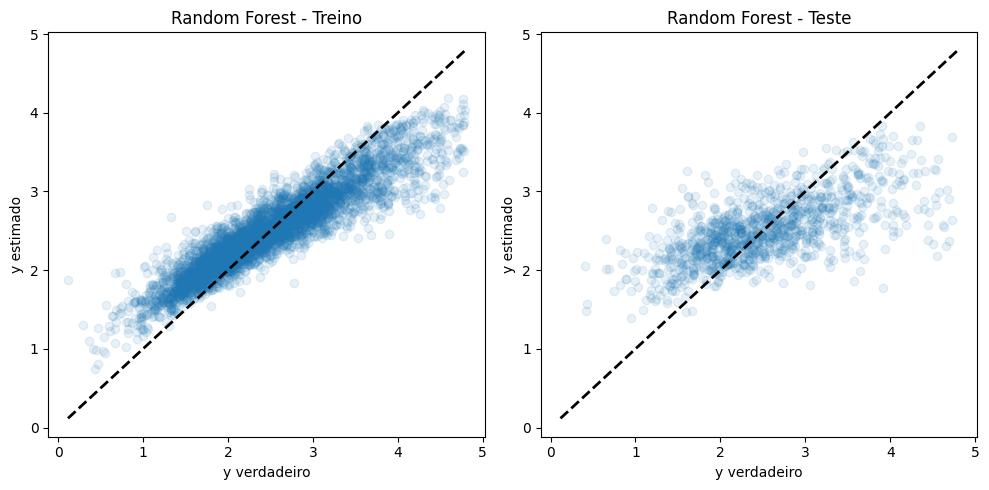

In [ ]:
# Desempenho nos conjuntos de treino e teste
from sklearn.metrics import PredictionErrorDisplay

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(y_train, y_pred_train, alpha = 0.1)
ax[0].set_xlabel('y verdadeiro')
ax[0].set_ylabel('y estimado')
ax[0].set_title('Random Forest - Treino')
ax[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2) # 1:1 dashed line

ax[1].scatter(y_test, y_pred_test, alpha = 0.1)
ax[1].set_xlabel('y verdadeiro')
ax[1].set_ylabel('y estimado')
ax[1].set_title('Random Forest - Teste')
ax[1].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2) # 1:1 dashed line

plt.tight_layout()
plt.show()

Nota-se, pelos gráficos, que o modelo subestima os valores reais da variável alvo que estão em faixas mais elevadas. Possivelmente, isso é devido ao baixo número de valores da variável alvo nessas faixas mais elevadas na amostra.

In [ ]:
nomes

Index(['Mass_BC_PSAP_STP', 'Mass_ammonium_STP', 'Mass_chloride_STP',
       'Mass_nitrate_STP', 'Mass_organics_STP', 'Mass_sulfate_STP',
       'conc D>100', 'vol'],
      dtype='object')

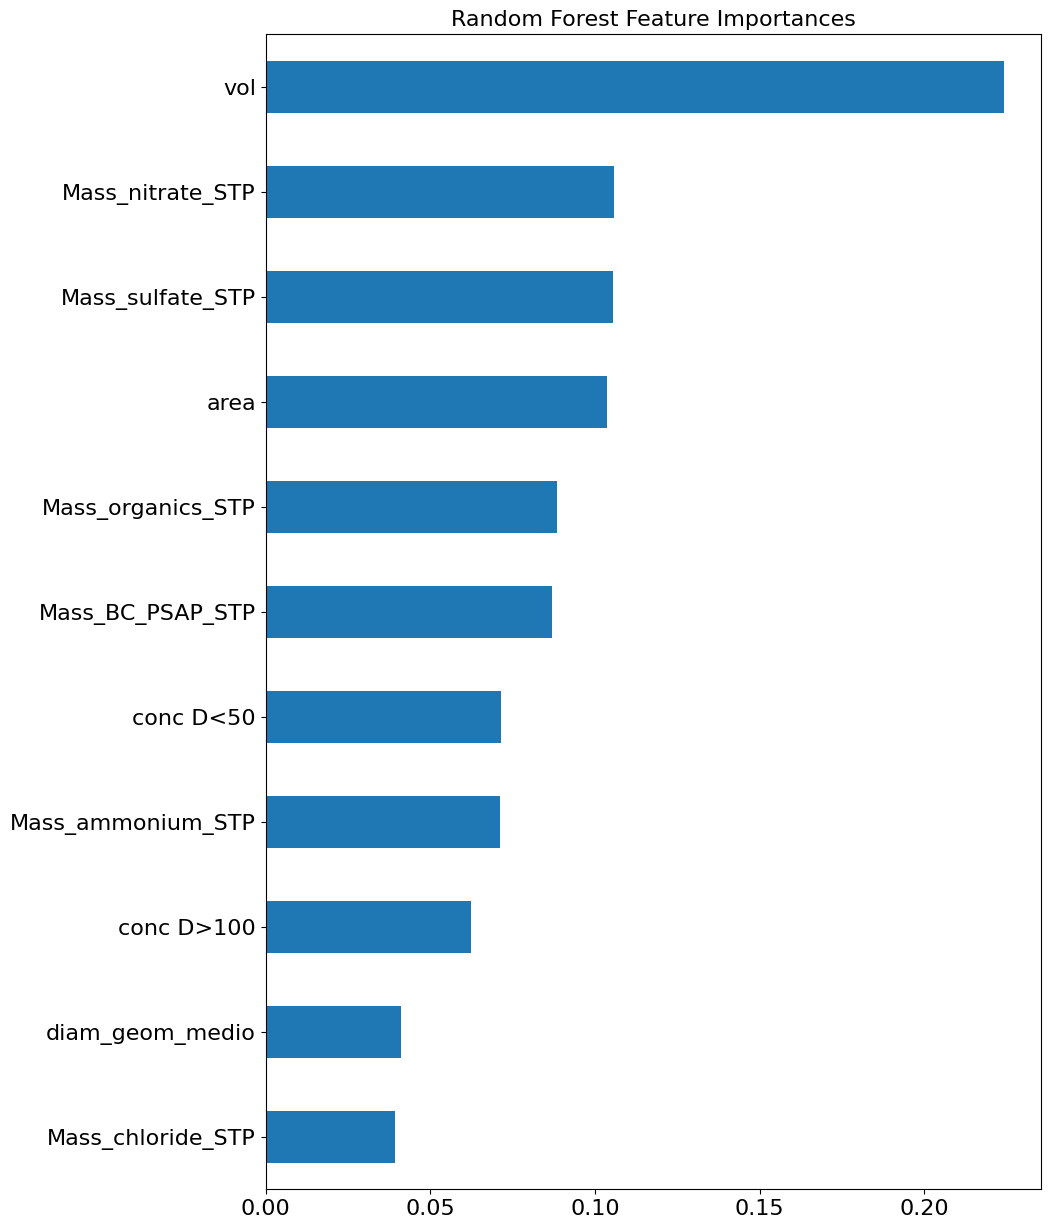

In [ ]:
importances = rf.feature_importances_
nomes = dados_finais.drop(columns=["Scattering_Eff", "soma_Qc"]).columns
pd.Series(importances, index=nomes).sort_values().plot.barh(figsize = (10,15), fontsize=16)
plt.title("Random Forest Feature Importances", fontsize=16)
plt.show()

In [ ]:
# SHAP (SHapley Additive exPlanations)
# Valor absoluto SHAP: indica a importância de cada preditor
# Sinal do SHAP: indica se o preditor contribui para aumento ou diminuição da variável alvo
# Cor: indica como cada preditor influencia no valor da variável alvo
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, feature_names=nomes)

A seguir será realizada uma seleção de alguns preditores que serão utilizados no RF.

In [ ]:
# Vamos aqui pegar o principal representante de cada conjunto de preditores correlacionados
# Elegemos o principal com base nas correlações com o alvo
# Utilizamos só o conjunto de treino do alvo para isso para evitar vazamento de dados
correlation_threshold = 0.9  # valor de corte para correlação entre preditores

# Voltando para DataFrame para calcular a matriz de correlação
X_train_s = pd.DataFrame(X_train_s, columns=X_train.columns)
X_test_s  = pd.DataFrame(X_test_s,  columns=X_test.columns)

# Matriz de correlação entre preditores (treino)
corr_matrix = X_train_s.corr().abs()

# Correlação de cada preditor com o alvo
# Função para calcular a correlação de uma coluna com o alvo
def correlacao_com_y(coluna):
    """
    Retorna o coeficiente de correlação de Pearson entre uma coluna (preditora)
    e o vetor de saída y_train.
    """
    return np.corrcoef(coluna, y_train)[0, 1]

# Aplicar a função a cada coluna de X_train_s
corr_with_target = X_train_s.apply(correlacao_com_y).abs()

# Criar um conjunto para armazenar as colunas a remover
to_drop = set()

# Percorrer as colunas e remover uma de cada par correlacionado
for col in corr_matrix.columns:
    if col in to_drop:
        continue
    # Achar colunas altamente correlacionadas com a atual
    high_corr = corr_matrix.index[(corr_matrix[col] > correlation_threshold) & (corr_matrix.index != col)]
    for correlated_col in high_corr:
        # Comparar correlação com y e decidir qual manter
        if corr_with_target[col] >= corr_with_target[correlated_col]:
            to_drop.add(correlated_col)
        else:
            to_drop.add(col)

# Criar os novos DataFrames reduzidos (mantendo coerência entre treino e teste)
X_train_s_reduced = X_train_s.drop(columns=to_drop)
X_test_s_reduced = X_test_s.drop(columns=to_drop)

# Relatório final
print(f"Número de preditores iniciais: {X_train_s.shape[1]}")
print(f"Número de preditores removidos: {len(to_drop)}")
print(f"Número de preditores restantes: {X_train_s_reduced.shape[1]}")
print(f"Colunas removidas: {sorted(to_drop)}")

Número de preditores iniciais: 11
Número de preditores removidos: 3
Número de preditores restantes: 8
Colunas removidas: ['area', 'conc D<50', 'diam_geom_medio']


In [ ]:
dados_finais.corr()

,Mass_BC_PSAP_STP,Mass_ammonium_STP,Mass_chloride_STP,Mass_nitrate_STP,Mass_organics_STP,Mass_sulfate_STP,soma_Qc,diam_geom_medio,conc D<50,conc D>100,area,vol,Scattering_Eff
Mass_BC_PSAP_STP,1.000000,0.097018,0.012444,0.166898,0.620158,0.413992,0.313858,-0.297319,0.314095,-0.307685,-0.282440,-0.321403,0.128341
Mass_ammonium_STP,0.097018,1.000000,-0.011381,0.411528,0.140019,0.387148,0.191954,-0.257179,0.306777,-0.208745,-0.467980,-0.425758,0.048475
Mass_chloride_STP,0.012444,-0.011381,1.000000,0.078743,0.007067,-0.066097,0.012775,-0.030685,0.030467,-0.040833,-0.038660,-0.040890,0.020336
Mass_nitrate_STP,0.166898,0.411528,0.078743,1.000000,0.162176,0.259175,0.139246,-0.225304,0.261619,-0.211711,-0.473294,-0.416073,0.072635
Mass_organics_STP,0.620158,0.140019,0.007067,0.162176,1.000000,0.550805,0.371689,-0.423431,0.433002,-0.431055,-0.478703,-0.548315,-0.026745
Mass_sulfate_STP,0.413992,0.387148,-0.066097,0.259175,0.550805,1.000000,0.383094,-0.343193,0.396925,-0.254335,-0.493303,-0.467062,0.127902
soma_Qc,0.313858,0.191954,0.012775,0.139246,0.371689,0.383094,1.000000,-0.136093,0.175382,-0.116136,-0.141988,-0.114767,0.104945
diam_geom_medio,-0.297319,-0.257179,-0.030685,-0.225304,-0.423431,-0.343193,-0.136093,1.000000,-0.947260,0.943141,0.460782,0.589474,0.078807
conc D<50,0.314095,0.306777,0.030467,0.261619,0.433002,0.396925,0.175382,-0.947260,1.000000,-0.876523,-0.500623,-0.577942,-0.018345
conc D>100,-0.307685,-0.208745,-0.040833,-0.211711,-0.431055,-0.254335,-0.116136,0.943141,-0.876523,1.000000,0.403493,0.567494,0.110848


# Random Forest com preditores selecionados e com crescimento livre

O desempenho do RF com os preditores selecionados foi muito próximo do desempenho obtido com todos os preditores.

In [ ]:
# --- R² normal ---
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# --- R² ajustado ---
def r2_adjusted(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# treino
n_train, p = X_train_s.shape
r2_adj_train = r2_adjusted(r2_train, n_train, p)

# teste
n_test, p = X_test_s.shape
r2_adj_test = r2_adjusted(r2_test, n_test, p)

# --- Resultados ---
print(f"R² Ajustado Treino: {r2_adj_train:.4f}")
print(f"R² Ajustado Teste : {r2_adj_test:.4f}")

R² Ajustado Treino: 0.9113
R² Ajustado Teste : 0.3473


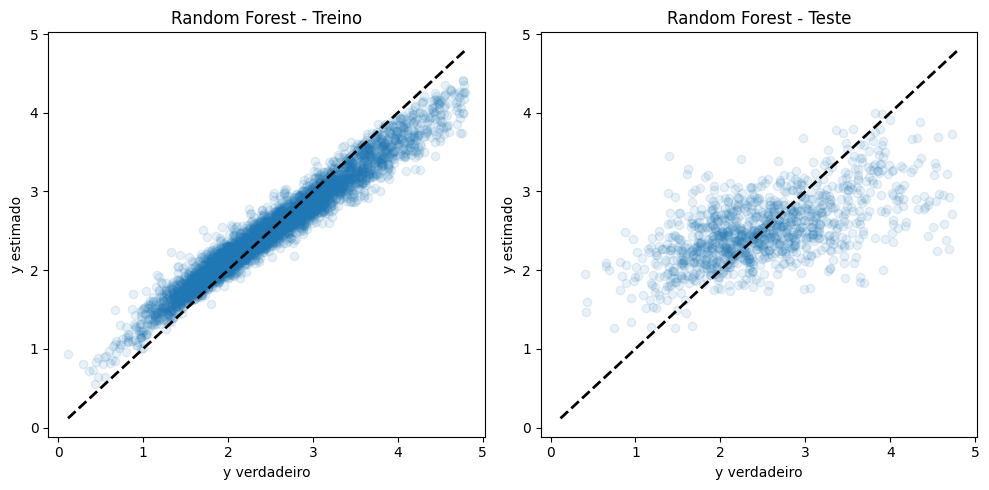

In [ ]:
# Desempenho nos conjuntos de treino e teste
from sklearn.metrics import PredictionErrorDisplay

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(y_train, y_pred_train, alpha=.1)
ax[0].set_xlabel('y verdadeiro')
ax[0].set_ylabel('y estimado')
ax[0].set_title('Random Forest - Treino')
ax[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2) # 1:1 dashed line

ax[1].scatter(y_test, y_pred_test, alpha=.1)
ax[1].set_xlabel('y verdadeiro')
ax[1].set_ylabel('y estimado')
ax[1].set_title('Random Forest - Teste')
ax[1].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2) # 1:1 dashed line

plt.tight_layout()
plt.show()

In [ ]:
# Para vermos os parâmetros que deixamos livres (aplicamos a árvore sem especificá-los)
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': True, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [ ]:
# Vamos ver a profundidade alcançada pela árvore "livre" com preditores selecionados
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_s_reduced, y_train)

# Profundidade de cada árvore
depths = [estimator.tree_.max_depth for estimator in rf.estimators_]

print("Profundidade média:", np.mean(depths))
print("Profundidade máxima:", np.max(depths))
print("Profundidade mínima:", np.min(depths))

Profundidade média: 31.6
Profundidade máxima: 40
Profundidade mínima: 25


# Otimização Random Forest (com preditores todos parâmetros)

Para otimizar os hiperparâmetros foi utilizado o  RandomizedSearchCV e depois, utilizando como referência os hiperpâmetros achados pelo RandomizedSearchCV, foi utilizado o GridSearch. Essa estratégia foi adotada pois o primeiro faz uma busca mais ampla e o segundo foca na melhor região encontrada.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

param_dist = {
    'n_estimators': np.arange(50,500,50),        # número de árvores
    'max_depth': np.arange(5,40,5),              # profundidade máxima
    'min_samples_split': randint(2, 10),      # mínimo p/ dividir
    'min_samples_leaf': randint(1, 5),        # mínimo p/ folha
    'max_features': ['sqrt', 'log2', 0.8]     # fração de variáveis por split
}

random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=20,                # só 20 combinações aleatórias
    cv=3,                     # 3-fold CV
    scoring='r2',             # ou 'neg_mean_absolute_error', etc.
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train_s, y_train)
print("Melhores parâmetros:", random_search.best_params_)
print("Melhor score (CV):", random_search.best_score_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Melhores parâmetros: {'max_depth': np.int64(20), 'max_features': 0.8, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': np.int64(100)}
Melhor score (CV): 0.39736569002920846


In [ ]:
# Random forest otimizado utilizado grid search
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Melhores parâmetros segundo RandomizedSearchCV;
# {'max_depth': 21, 'max_features': 0.8, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 363}
# vamos apenas ampliar o número de preditores para dar mais chances ao modelo

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5 , 8, 12, 15],
    'min_samples_split': [10, 30, 50],
    'min_samples_leaf': [5,10,20,30],
    'max_features': ['sqrt', 0.3, 0.5]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=3)
grid_search.fit(X_train_s_reduced, y_train)

print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)

In [ ]:
# Aplica o modelo com hiperparâmetros otimizados ao conjunto otimizado de preditores (otimização para este conjunto de dados)
from sklearn.ensemble import RandomForestRegressor
#rf = RandomForestRegressor(n_estimators=100, max_depth=15, min_samples_split= 10, min_samples_leaf=10, random_state=42, oob_score=True)
rf = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split= 6, min_samples_leaf=2, random_state=42, oob_score=True)
rf.fit(X_train_s, y_train)
y_pred_train = rf.predict(X_train_s) # predição para o conjunto de treino
y_pred_test = rf.predict(X_test_s) # predição para o conjunto de teste

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('Regressão Random Forest otimizado')
print('Desempenho no conjunto de treino')
print('R^2 = ', r2_score(y_train, y_pred_train))
print('MSE = ', mean_squared_error(y_train, y_pred_train))
print('RMSE =', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('MAE = ', mean_absolute_error(y_train, y_pred_train))
print('Desempenho no conjunto de teste')
print('R^2 = ', r2_score(y_test, y_pred_test))
print('MSE = ', mean_squared_error(y_test, y_pred_test))
print('RMSE =', np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('MAE = ', mean_absolute_error(y_test, y_pred_test))
print("------------------------------------")
print('OOB score:', rf.oob_score_)

Regressão Random Forest otimizado
Desempenho no conjunto de treino
R^2 =  0.8698589215966673
MSE =  0.08232504492653314
RMSE = 0.2869234129981956
MAE =  0.2166929570031713
Desempenho no conjunto de teste
R^2 =  0.41265032825387793
MSE =  0.37240369007084695
RMSE = 0.6102488755178882
MAE =  0.46752444789837483
------------------------------------
OOB score: 0.43333476346618205


In [ ]:
# --- R² normal ---
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# --- R² ajustado ---
def r2_adjusted(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# treino
n_train, p = X_train_s.shape
r2_adj_train = r2_adjusted(r2_train, n_train, p)

# teste
n_test, p = X_test_s.shape
r2_adj_test = r2_adjusted(r2_test, n_test, p)

# --- Resultados ---
print(f"R² Ajustado Treino: {r2_adj_train:.4f}")
print(f"R² Ajustado Teste : {r2_adj_test:.4f}")

R² Ajustado Treino: 0.8695
R² Ajustado Teste : 0.4069


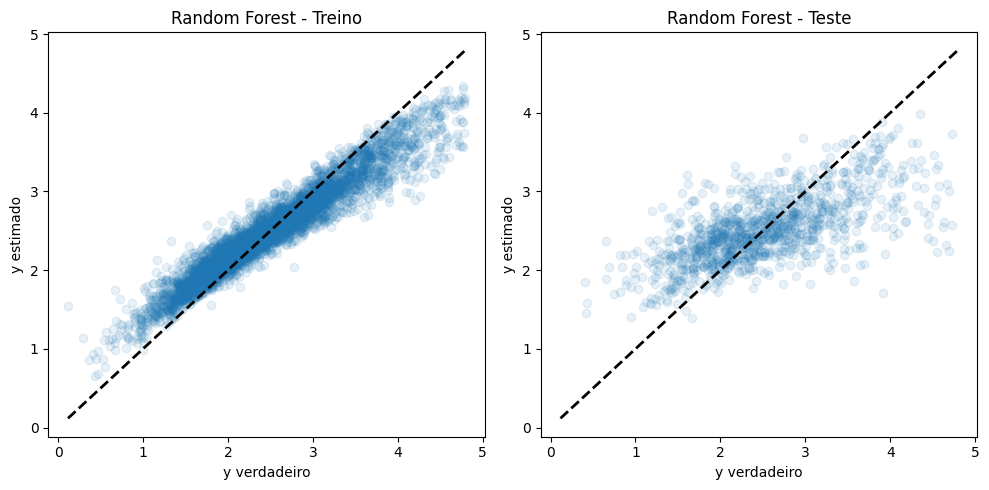

In [ ]:
# Desempenho nos conjuntos de treino e teste
from sklearn.metrics import PredictionErrorDisplay

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(y_train, y_pred_train, alpha=.1)
ax[0].set_xlabel('y verdadeiro')
ax[0].set_ylabel('y estimado')
ax[0].set_title('Random Forest - Treino')
ax[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2) # 1:1 dashed line

ax[1].scatter(y_test, y_pred_test, alpha=.1)
ax[1].set_xlabel('y verdadeiro')
ax[1].set_ylabel('y estimado')
ax[1].set_title('Random Forest - Teste')
ax[1].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2) # 1:1 dashed line

plt.tight_layout()
plt.show()

## Testes Random Forest

### Teste 1: aumento das folhas e redução da profundidade

In [ ]:
# Aplica o modelo com hiperparâmetros otimizados ao conjunto otimizado de preditores (otimização para este conjunto de dados)
from sklearn.ensemble import RandomForestRegressor
#rf = RandomForestRegressor(n_estimators=100, max_depth=15, min_samples_split= 10, min_samples_leaf=10, random_state=42, oob_score=True)
rf = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split= 6, min_samples_leaf=5, random_state=42, oob_score=True)
rf.fit(X_train_s, y_train)
y_pred_train = rf.predict(X_train_s) # predição para o conjunto de treino
y_pred_test = rf.predict(X_test_s) # predição para o conjunto de teste

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('Regressão Random Forest otimizado')
print('Desempenho no conjunto de treino')
print('R^2 = ', r2_score(y_train, y_pred_train))
print('MSE = ', mean_squared_error(y_train, y_pred_train))
print('RMSE =', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('MAE = ', mean_absolute_error(y_train, y_pred_train))
print('Desempenho no conjunto de teste')
print('R^2 = ', r2_score(y_test, y_pred_test))
print('MSE = ', mean_squared_error(y_test, y_pred_test))
print('RMSE =', np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('MAE = ', mean_absolute_error(y_test, y_pred_test))
print("------------------------------------")
print('OOB score:', rf.oob_score_)

Regressão Random Forest otimizado
Desempenho no conjunto de treino
R^2 =  0.6560608955647493
MSE =  0.21833402084315032
RMSE = 0.4672622613085186
MAE =  0.3695433598420117
Desempenho no conjunto de teste
R^2 =  0.3919820853055521
MSE =  0.3882055788077616
RMSE = 0.6230614566860653
MAE =  0.4846292427095802
------------------------------------
OOB score: 0.37328275101913855


In [ ]:
# --- R² normal ---
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# --- R² ajustado ---
def r2_adjusted(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# treino
n_train, p = X_train_s.shape
r2_adj_train = r2_adjusted(r2_train, n_train, p)

# teste
n_test, p = X_test_s.shape
r2_adj_test = r2_adjusted(r2_test, n_test, p)

# --- Resultados ---
print(f"R² Ajustado Treino: {r2_adj_train:.4f}")
print(f"R² Ajustado Teste : {r2_adj_test:.4f}")

R² Ajustado Treino: 0.6550
R² Ajustado Teste : 0.3860


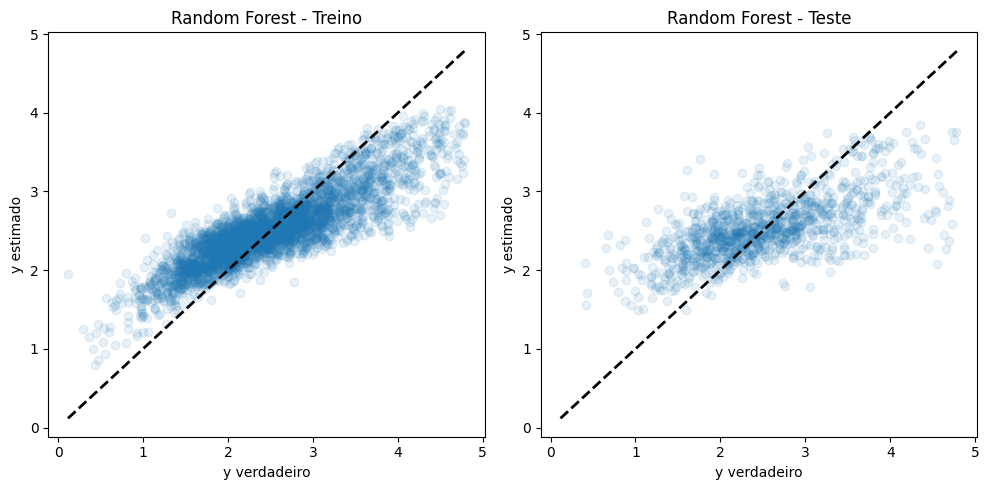

In [ ]:
# Desempenho nos conjuntos de treino e teste
from sklearn.metrics import PredictionErrorDisplay

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(y_train, y_pred_train, alpha=.1)
ax[0].set_xlabel('y verdadeiro')
ax[0].set_ylabel('y estimado')
ax[0].set_title('Random Forest - Treino')
ax[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2) # 1:1 dashed line

ax[1].scatter(y_test, y_pred_test, alpha=.1)
ax[1].set_xlabel('y verdadeiro')
ax[1].set_ylabel('y estimado')
ax[1].set_title('Random Forest - Teste')
ax[1].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2) # 1:1 dashed line

plt.tight_layout()
plt.show()

# Continuação do que estava sendo feito antes...


In [ ]:
# Aplica o modelo com hiperparâmetros otimizados ao conjunto otimizado de preditores (otimização do conjunto de dados mais completo)
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth=15, min_samples_split= 10, min_samples_leaf=10, random_state=42, oob_score=True)
#rf = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split= 6, min_samples_leaf=2, random_state=42, oob_score=True)
rf.fit(X_train_s, y_train)
y_pred_train = rf.predict(X_train_s) # predição para o conjunto de treino
y_pred_test = rf.predict(X_test_s) # predição para o conjunto de teste

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('Regressão Random Forest otimizado')
print('Desempenho no conjunto de treino')
print('R^2 = ', r2_score(y_train, y_pred_train))
print('MSE = ', mean_squared_error(y_train, y_pred_train))
print('RMSE =', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('MAE = ', mean_absolute_error(y_train, y_pred_train))
print('Desempenho no conjunto de teste')
print('R^2 = ', r2_score(y_test, y_pred_test))
print('MSE = ', mean_squared_error(y_test, y_pred_test))
print('RMSE =', np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('MAE = ', mean_absolute_error(y_test, y_pred_test))
print("------------------------------------")
print('OOB score:', rf.oob_score_)

Regressão Random Forest otimizado
Desempenho no conjunto de treino
R^2 =  0.6414668300839761
MSE =  0.22680201887917617
RMSE = 0.47623735561080904
MAE =  0.37064558364948424
Desempenho no conjunto de teste
R^2 =  0.3668393801721187
MSE =  0.4014497029179695
RMSE = 0.6336005862670658
MAE =  0.4924517388244633
------------------------------------
OOB score: 0.39009985434431027


In [ ]:
# Aplica o modelo com hiperparâmetros otimizados ao conjunto otimizado de preditores
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=50, max_depth=10,max_features= 0.8, min_samples_split= 10, min_samples_leaf=4, random_state=42, oob_score=True)
rf.fit(X_train_s, y_train)
y_pred_train = rf.predict(X_train_s) # predição para o conjunto de treino
y_pred_test = rf.predict(X_test_s) # predição para o conjunto de teste

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('Regressão Random Forest otimizado')
print('Desempenho no conjunto de treino')
print('R^2 = ', r2_score(y_train, y_pred_train))
print('MSE = ', mean_squared_error(y_train, y_pred_train))
print('RMSE =', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('MAE = ', mean_absolute_error(y_train, y_pred_train))
print('Desempenho no conjunto de teste')
print('R^2 = ', r2_score(y_test, y_pred_test))
print('MSE = ', mean_squared_error(y_test, y_pred_test))
print('RMSE =', np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('MAE = ', mean_absolute_error(y_test, y_pred_test))
print("------------------------------------")
print('OOB score:', rf.oob_score_)

Regressão Random Forest otimizado
Desempenho no conjunto de treino
R^2 =  0.6244448455502207
MSE =  0.2375698383768535
RMSE = 0.48741136463653933
MAE =  0.3872230983950555
Desempenho no conjunto de teste
R^2 =  0.3565315833135997
MSE =  0.40798526728663814
RMSE = 0.6387372443240164
MAE =  0.4961384362957476
------------------------------------
OOB score: 0.3667378080559872


In [ ]:
# --- R² normal ---
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# --- R² ajustado ---
def r2_adjusted(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# treino
n_train, p = X_train_s.shape
r2_adj_train = r2_adjusted(r2_train, n_train, p)

# teste
n_test, p = X_test_s.shape
r2_adj_test = r2_adjusted(r2_test, n_test, p)

# --- Resultados ---
print(f"R² Ajustado Treino: {r2_adj_train:.4f}")
print(f"R² Ajustado Teste : {r2_adj_test:.4f}")

R² Ajustado Treino: 0.6235
R² Ajustado Teste : 0.3502


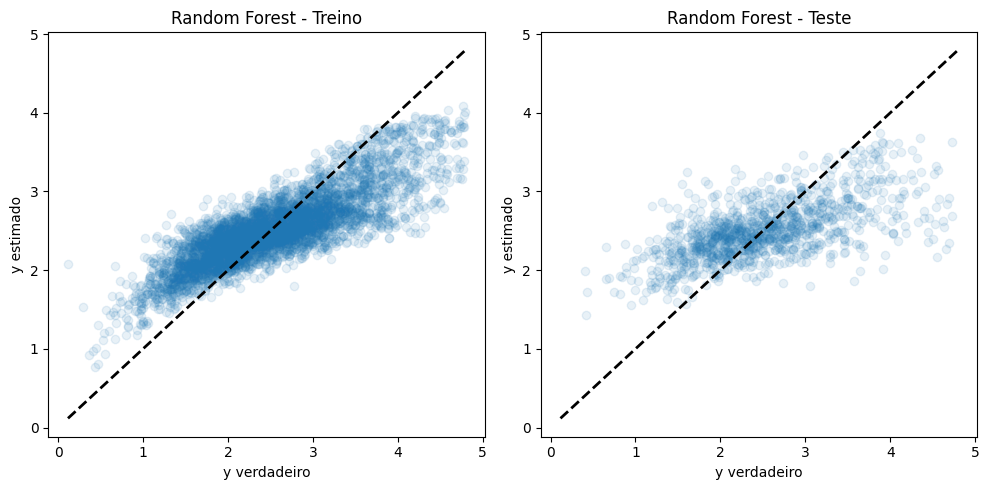

In [ ]:
# Desempenho nos conjuntos de treino e teste
from sklearn.metrics import PredictionErrorDisplay

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(y_train, y_pred_train, alpha=.1)
ax[0].set_xlabel('y verdadeiro')
ax[0].set_ylabel('y estimado')
ax[0].set_title('Random Forest - Treino')
ax[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2) # 1:1 dashed line

ax[1].scatter(y_test, y_pred_test, alpha=.1)
ax[1].set_xlabel('y verdadeiro')
ax[1].set_ylabel('y estimado')
ax[1].set_title('Random Forest - Teste')
ax[1].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2) # 1:1 dashed line

plt.tight_layout()
plt.show()

In [ ]:
# Funcionalidade imbutida no RF, baseada na redução média da impureza
importances = rf.feature_importances_
nomes = X_train_s_reduced.columns # Use the columns from the reduced dataset
pd.Series(importances, index=nomes).sort_values().plot.barh(figsize = (10,15))
plt.title("Random Forest Feature Importances")
plt.show()